In [89]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd
import numpy as np
import seaborn as sns

from ipywidgets import interact
import ipywidgets as widgets

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D




In [91]:
#client_id = 'insert client id'
#client_secret = 'insert client secret'

In [92]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [93]:
def get_all_tracks(artist_name):
    results = sp.search(q='artist:' + artist_name, type='artist')
    artist_id = results['artists']['items'][0]['id']


    albums = []
    results = sp.artist_albums(artist_id, album_type='album')
    albums.extend(results['items'])
    while results['next']:
        results = sp.next(results)
        albums.extend(results['items'])


    seen = set() 
    albums_unique = []
    for album in albums:
        if album['name'] not in seen:
            seen.add(album['name'])
            albums_unique.append(album)

    tracks_info = []
    for album in albums_unique:
        tracks = sp.album_tracks(album['id'])['items']
        for track in tracks:
            track_features = sp.audio_features(track['id'])[0]
            track_info = {
                'track_name': track['name'],
                'album_name': album['name'],
                'release_date': album['release_date'],
                'acousticness': track_features['acousticness'],
                'danceability': track_features['danceability'],
                'duration_ms': track_features['duration_ms'],
                'energy': track_features['energy'],
                'id': track_features['id'],
                'instrumentalness': track_features['instrumentalness'],
                'key': track_features['key'],
                'liveness': track_features['liveness'],
                'loudness': track_features['loudness'],
                'mode': track_features['mode'],
                'speechiness': track_features['speechiness'],
                'tempo': track_features['tempo'],
                'time_signature': track_features['time_signature'],
                'track_href': track_features['track_href'],
                'type': track_features['type'],
                'uri': track_features['uri'],
                'valence': track_features['valence']
            }
            tracks_info.append(track_info)

    return tracks_info

In [94]:
pink_floyd_tracks = get_all_tracks('Pink Floyd')

df = pd.DataFrame(pink_floyd_tracks)
display(df)

,track_name,album_name,release_date,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,Speak to Me - Live at Wembley 1974 - 2023 Master,The Dark Side Of The Moon (Live at Wembley 197...,2023-03-24,0.00149,0.355,165080,0.107,0l89tjmuVaZtm4PIIW0PK4,0.003870,5,0.3770,-28.795,0,0.1000,96.434,4,https://api.spotify.com/v1/tracks/0l89tjmuVaZt...,audio_features,spotify:track:0l89tjmuVaZtm4PIIW0PK4,0.0369
1,Breathe (In the Air) - Live at Wembley 1974 - ...,The Dark Side Of The Moon (Live at Wembley 197...,2023-03-24,0.64300,0.398,170987,0.384,63i7sfo3dD9j9hnGUWj9LG,0.000051,11,0.1750,-16.113,0,0.0334,124.233,4,https://api.spotify.com/v1/tracks/63i7sfo3dD9j...,audio_features,spotify:track:63i7sfo3dD9j9hnGUWj9LG,0.1800
2,On the Run - Live at Wembley 1974 - 2023 Master,The Dark Side Of The Moon (Live at Wembley 197...,2023-03-24,0.06020,0.167,308720,0.597,5K2qgFTfUSDv9mOEOaBjbc,0.617000,0,0.1910,-21.387,1,0.1000,82.237,4,https://api.spotify.com/v1/tracks/5K2qgFTfUSDv...,audio_features,spotify:track:5K2qgFTfUSDv9mOEOaBjbc,0.1070
3,Time - Live at Wembley 1974 - 2023 Master,The Dark Side Of The Moon (Live at Wembley 197...,2023-03-24,0.18800,0.388,391533,0.506,273GWYLdxhCdFAjhS8FOGX,0.000245,6,0.4650,-12.890,0,0.0454,135.430,4,https://api.spotify.com/v1/tracks/273GWYLdxhCd...,audio_features,spotify:track:273GWYLdxhCdFAjhS8FOGX,0.3670
4,The Great Gig in the Sky - Live at Wembley 197...,The Dark Side Of The Moon (Live at Wembley 197...,2023-03-24,0.37600,0.291,410053,0.316,0q5SXCDmNRyOS4BsZ0WWqE,0.657000,5,0.2140,-14.204,1,0.0316,129.844,4,https://api.spotify.com/v1/tracks/0q5SXCDmNRyO...,audio_features,spotify:track:0q5SXCDmNRyOS4BsZ0WWqE,0.2440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,Interstellar Overdrive,The Piper at the Gates of Dawn,1967-08-05,0.76700,0.230,580716,0.704,3xyTufSSGLP3oZnomceAVW,0.869000,9,0.1120,-10.975,1,0.0566,94.227,4,https://api.spotify.com/v1/tracks/3xyTufSSGLP3...,audio_features,spotify:track:3xyTufSSGLP3oZnomceAVW,0.3080
272,The Gnome,The Piper at the Gates of Dawn,1967-08-05,0.65500,0.533,133911,0.353,1GqRmuG89ILDLcuAdcli6r,0.000000,2,0.0975,-12.261,1,0.0300,115.978,4,https://api.spotify.com/v1/tracks/1GqRmuG89ILD...,audio_features,spotify:track:1GqRmuG89ILDLcuAdcli6r,0.3720
273,Chapter 24,The Piper at the Gates of Dawn,1967-08-05,0.70400,0.231,222427,0.376,0j9iv7tRpEpTGSGpkCMJve,0.000572,2,0.0606,-10.898,1,0.0335,128.746,4,https://api.spotify.com/v1/tracks/0j9iv7tRpEpT...,audio_features,spotify:track:0j9iv7tRpEpTGSGpkCMJve,0.3440
274,The Scarecrow,The Piper at the Gates of Dawn,1967-08-05,0.38500,0.558,131267,0.339,1aV8FeJiQpZXFY35rLNNu0,0.784000,2,0.0261,-13.581,1,0.0623,155.156,3,https://api.spotify.com/v1/tracks/1aV8FeJiQpZX...,audio_features,spotify:track:1aV8FeJiQpZXFY35rLNNu0,0.9210


In [95]:
df.columns

Index(['track_name', 'album_name', 'release_date', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'id', 'instrumentalness',
       'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'track_href', 'type', 'uri', 'valence'],
      dtype='object')

In [96]:
df['album_name'].unique()

array(['The Dark Side Of The Moon (Live at Wembley 1974) [2023 Master]',
       'Live at Knebworth 1990',
       'Delicate Sound of Thunder (2019 Remix) [Live]',
       'The Endless River', 'Pulse (Live)', 'The Division Bell',
       'Delicate Sound of Thunder (Live)', 'A Momentary Lapse of Reason',
       'A Momentary Lapse of Reason (2019 Remix)', 'The Final Cut',
       'The Wall', 'Animals', 'Animals (2018 Remix)',
       'Wish You Were Here',
       'The Dark Side Of The Moon (50th Anniversary) [2023 Remaster]',
       'The Dark Side of the Moon', 'Obscured by Clouds', 'Meddle',
       'Atom Heart Mother', 'Ummagumma', 'More', 'A Saucerful of Secrets',
       'The Piper at the Gates of Dawn'], dtype=object)

In [97]:
studio_albuns = [
       'The Division Bell', 'A Momentary Lapse of Reason', 'The Final Cut',
       'The Wall', 'Animals', 'Wish You Were Here', 'The Dark Side of the Moon', 
       'Obscured by Clouds', 'Meddle', 'Atom Heart Mother', 'Ummagumma', 'More', 'A Saucerful of Secrets',
       'The Piper at the Gates of Dawn'
]

df_filtered = df[df['album_name'].isin(studio_albuns)]

In [98]:
df_infos = df_filtered[['id','track_name', 'album_name', 'release_date','track_href', 'type', 'uri']].copy()
df_infos.set_index('id',inplace=True)
df_metrics = df_filtered[['id', 'danceability', 'duration_ms', 'energy',  'instrumentalness',
                 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'acousticness',
                 'time_signature', 'valence']].copy()
df_metrics.set_index('id',inplace=True)

In [99]:
df_metrics['odd_time_signature'] = [time%2 for time in df_metrics['time_signature']]
df_metrics.drop(['key','time_signature'],axis=1,inplace=True)
#df_metrics = pd.get_dummies(df_metrics,columns=['key'],dtype='int')

df_infos['year'] = [date.split('-')[0] for date in df_infos['release_date']]
df_infos['decade'] = [year[2]+'0'for year in df_infos['year']]
df_infos['period'] = ["Syd's age" if int(year) < 1970 else
                      "Pre TDSOTM" if int(year) < 1973 else
                     "Golden age" if int(year) < 1987 else 
                     "Post Roger" 
                     for year in df_infos['year']]

In [100]:
df_infos

,track_name,album_name,release_date,track_href,type,uri,year,decade,period
id,,,,,,,,,
0iJfN2CqrX7O8hkzgAMMAf,Cluster One,The Division Bell,1994,https://api.spotify.com/v1/tracks/0iJfN2CqrX7O...,audio_features,spotify:track:0iJfN2CqrX7O8hkzgAMMAf,1994,90,Post Roger
3Tsh9pjiJ5cvmuiZALdgVz,What Do You Want from Me,The Division Bell,1994,https://api.spotify.com/v1/tracks/3Tsh9pjiJ5cv...,audio_features,spotify:track:3Tsh9pjiJ5cvmuiZALdgVz,1994,90,Post Roger
6uE9hF8fIb6shBXrrzA12U,Poles Apart,The Division Bell,1994,https://api.spotify.com/v1/tracks/6uE9hF8fIb6s...,audio_features,spotify:track:6uE9hF8fIb6shBXrrzA12U,1994,90,Post Roger
6bIPHR8AJG5HAcn9oF21Ma,Marooned,The Division Bell,1994,https://api.spotify.com/v1/tracks/6bIPHR8AJG5H...,audio_features,spotify:track:6bIPHR8AJG5HAcn9oF21Ma,1994,90,Post Roger
2dxfyqdrI8XVOT3H1YcOsU,A Great Day for Freedom,The Division Bell,1994,https://api.spotify.com/v1/tracks/2dxfyqdrI8XV...,audio_features,spotify:track:2dxfyqdrI8XVOT3H1YcOsU,1994,90,Post Roger
...,...,...,...,...,...,...,...,...,...
3xyTufSSGLP3oZnomceAVW,Interstellar Overdrive,The Piper at the Gates of Dawn,1967-08-05,https://api.spotify.com/v1/tracks/3xyTufSSGLP3...,audio_features,spotify:track:3xyTufSSGLP3oZnomceAVW,1967,60,Syd's age
1GqRmuG89ILDLcuAdcli6r,The Gnome,The Piper at the Gates of Dawn,1967-08-05,https://api.spotify.com/v1/tracks/1GqRmuG89ILD...,audio_features,spotify:track:1GqRmuG89ILDLcuAdcli6r,1967,60,Syd's age
0j9iv7tRpEpTGSGpkCMJve,Chapter 24,The Piper at the Gates of Dawn,1967-08-05,https://api.spotify.com/v1/tracks/0j9iv7tRpEpT...,audio_features,spotify:track:0j9iv7tRpEpTGSGpkCMJve,1967,60,Syd's age


In [101]:
df_metrics

,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,acousticness,valence,odd_time_signature
id,,,,,,,,,,,,
0iJfN2CqrX7O8hkzgAMMAf,0.236,355634,0.0556,0.923000,0.1180,-22.116,1,0.0339,103.659,0.770,0.0329,0
3Tsh9pjiJ5cvmuiZALdgVz,0.515,261587,0.5650,0.000013,0.1220,-9.547,1,0.0304,104.372,0.113,0.3740,0
6uE9hF8fIb6shBXrrzA12U,0.162,423064,0.4110,0.076900,0.6870,-11.333,1,0.0346,61.418,0.300,0.2460,0
6bIPHR8AJG5HAcn9oF21Ma,0.396,330385,0.3410,0.568000,0.1200,-14.836,1,0.0303,74.203,0.384,0.1480,0
2dxfyqdrI8XVOT3H1YcOsU,0.386,256986,0.3480,0.001230,0.2360,-12.239,1,0.0291,84.376,0.626,0.2650,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3xyTufSSGLP3oZnomceAVW,0.230,580716,0.7040,0.869000,0.1120,-10.975,1,0.0566,94.227,0.767,0.3080,0
1GqRmuG89ILDLcuAdcli6r,0.533,133911,0.3530,0.000000,0.0975,-12.261,1,0.0300,115.978,0.655,0.3720,0
0j9iv7tRpEpTGSGpkCMJve,0.231,222427,0.3760,0.000572,0.0606,-10.898,1,0.0335,128.746,0.704,0.3440,0


In [102]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_metrics_pre_pca = df_metrics.copy()


scaler = StandardScaler()
columns_to_scale = ['duration_ms','loudness','tempo']
df_metrics_pre_pca[columns_to_scale] = scaler.fit_transform(df_metrics_pre_pca[columns_to_scale])

pca = PCA(n_components=3)

principal_components = pca.fit_transform(df_metrics_pre_pca)

df_pca = pd.DataFrame(data=principal_components).set_index(df_metrics.index)

pca.explained_variance_ratio_,pca.explained_variance_ratio_.sum()

(array([0.35668633, 0.26478545, 0.20959925]), 0.8310710222712117)

In [103]:
df_pca

,0,1,2
id,,,
0iJfN2CqrX7O8hkzgAMMAf,-0.884941,-0.322985,1.145775
3Tsh9pjiJ5cvmuiZALdgVz,0.619640,-0.409740,-1.086314
6uE9hF8fIb6shBXrrzA12U,0.440705,-1.965646,-0.519413
6bIPHR8AJG5HAcn9oF21Ma,-0.216588,-1.331993,-0.183879
2dxfyqdrI8XVOT3H1YcOsU,-0.054973,-0.956145,-0.805602
...,...,...,...
3xyTufSSGLP3oZnomceAVW,1.267676,-1.175536,0.198083
1GqRmuG89ILDLcuAdcli6r,-0.095272,0.165651,-0.994468
0j9iv7tRpEpTGSGpkCMJve,0.486653,0.394983,-0.827790


In [104]:
df_pca = df_pca.join(
    df_infos,
    how = 'inner'
)

In [105]:

def update_plot(elev=30, azim=45):

    unique_albums = df_pca['album_name'].unique()
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_albums)))
    color_dict = dict(zip(unique_albums, colors))
    
    
    fig = plt.figure(figsize=(50, 12))
    ax = fig.add_subplot(111, projection='3d')
    

    for album in unique_albums:
        indices = df_pca['album_name'] == album
        ax.scatter(df_pca.loc[indices, 0], df_pca.loc[indices, 1], df_pca.loc[indices, 2], color=color_dict[album], label=album)
    
    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.set_zlabel('Componente Principal 3')
    

    ax.view_init(elev=elev, azim=azim)  
    

    plt.title('PCA - Scatter Plot 3D por Álbum')
    

    ax.legend(title='Álbum')
    

    plt.show()
    


interact(update_plot, elev=widgets.IntSlider(min=0, max=90, step=1, value=30),
         azim=widgets.IntSlider(min=0, max=360, step=1, value=45))
    
    

interactive(children=(IntSlider(value=30, description='elev', max=90), IntSlider(value=45, description='azim',…

<function __main__.update_plot(elev=30, azim=45)>

In [106]:
def update_plot(elev=30, azim=45):


    unique_period = df_pca['decade'].unique()
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_period)))
    color_dict = dict(zip(unique_period, colors))
    

    fig = plt.figure(figsize=(50, 12))
    ax = fig.add_subplot(111, projection='3d')
    

    for period in unique_period:
        indices = df_pca['decade'] == period
        ax.scatter(df_pca.loc[indices, 0], df_pca.loc[indices, 1], df_pca.loc[indices, 2], color=color_dict[period], label=period)
    

    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.set_zlabel('Componente Principal 3')
    

    ax.view_init(elev=elev, azim=azim) 
    

    plt.title('PCA - Scatter Plot 3D por Década')

    ax.legend(title='Década')
    

    plt.show()
    
interact(update_plot, elev=widgets.IntSlider(min=0, max=90, step=1, value=30),
         azim=widgets.IntSlider(min=0, max=360, step=1, value=45))

interactive(children=(IntSlider(value=30, description='elev', max=90), IntSlider(value=45, description='azim',…

<function __main__.update_plot(elev=30, azim=45)>

In [107]:
decade_aggregation = df_pca[[0,1,2,'decade']].groupby(['decade']).agg(['mean', 'std','count'])

In [108]:
decade_aggregation

0                         1                         2  \
            mean       std count      mean       std count      mean   
decade                                                                 
60      0.122837  0.938243    47 -0.003364  0.990915    47 -0.237420   
70     -0.063781  1.381788    67  0.116684  0.951552    67  0.270323   
80     -0.235641  1.004868    24 -0.038841  1.086511    24 -0.195680   
90      0.377765  0.620735    11 -0.611598  0.972103    11 -0.205146   

                        
             std count  
decade                  
60      0.814959    47  
70      1.004775    67  
80      0.527719    24  
90      0.593688    11

Max k: 3 com a silhueta de: 0.28


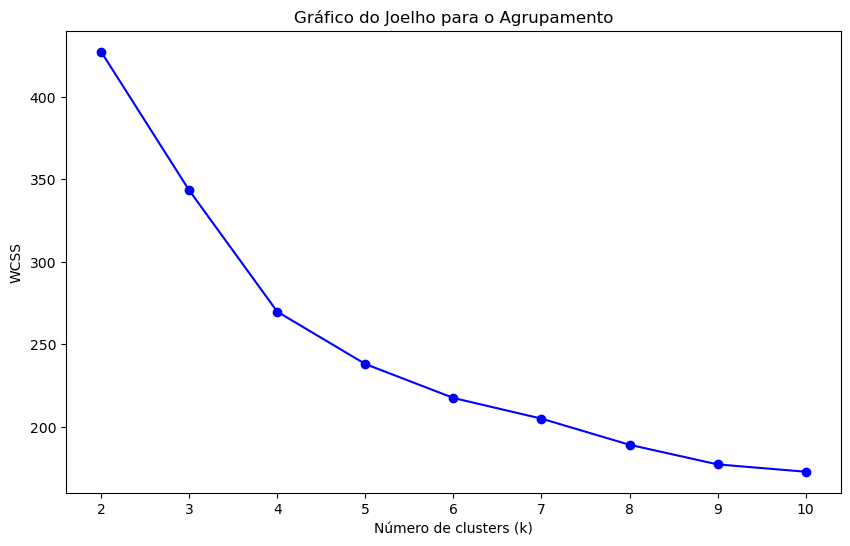

In [109]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer

df_metrics_pre_group = df_metrics.copy()

scaler = StandardScaler()
columns_to_scale = ['duration_ms','loudness','tempo']
df_metrics_pre_group[columns_to_scale] = scaler.fit_transform(df_metrics_pre_group[columns_to_scale])


k_values = range(2, 11)

silhouette_scores = {}

wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0, n_init=10)
    labels = kmeans.fit_predict(df_metrics_pre_group)
    score = silhouette_score(df_metrics_pre_group, labels)
    silhouette_scores[k] = score
    wcss.append(kmeans.inertia_)

max_k = max(silhouette_scores, key=silhouette_scores.get)
max_score = silhouette_scores[max_k]

print(f"Max k: {max_k} com a silhueta de: {max_score:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, 'bo-')
plt.title('Gráfico do Joelho para o Agrupamento')
plt.xlabel('Número de clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_values)
plt.show()

In [110]:
k=4

kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0, n_init=10)

kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
kmeans.fit(df_metrics_pre_group)

df_metrics_group = df_metrics_pre_group.copy()
df_metrics_group['cluster'] = kmeans.labels_

cluster_aggregation = df_metrics_group.groupby(['cluster']).agg(['mean', 'std','count'])

In [111]:
for metric in df_metrics:
    print(metric)
    display(cluster_aggregation[metric])

danceability


,mean,std,count
cluster,,,
0,0.435065,0.172608,31
1,0.411818,0.135264,66
2,0.363648,0.155385,42
3,0.296700,0.059922,10


duration_ms


,mean,std,count
cluster,,,
0,-0.649489,0.511597,31
1,-0.176274,0.429711,66
2,0.077303,0.611891,42
3,2.852155,1.377126,10


energy


,mean,std,count
cluster,,,
0,0.124268,0.094620,31
1,0.428970,0.181388,66
2,0.446000,0.191714,42
3,0.494800,0.219138,10


instrumentalness


,mean,std,count
cluster,,,
0,0.355435,0.354356,31
1,0.270812,0.342510,66
2,0.364188,0.365783,42
3,0.617475,0.293108,10


liveness


,mean,std,count
cluster,,,
0,0.193190,0.163851,31
1,0.218950,0.219938,66
2,0.312674,0.260368,42
3,0.302820,0.298693,10


loudness


,mean,std,count
cluster,,,
0,-1.546464,0.862892,31
1,0.430447,0.511102,66
2,0.373436,0.567145,42
3,0.384658,0.556927,10


mode


,mean,std,count
cluster,,,
0,0.741935,0.444803,31
1,0.833333,0.375534,66
2,0.738095,0.445001,42
3,0.100000,0.316228,10


speechiness


,mean,std,count
cluster,,,
0,0.060165,0.063016,31
1,0.047121,0.026814,66
2,0.069319,0.135067,42
3,0.083540,0.061742,10


tempo


,mean,std,count
cluster,,,
0,-0.280280,0.911009,31
1,0.712242,0.723491,66
2,-1.027140,0.398636,42
3,0.482058,0.335360,10


acousticness


,mean,std,count
cluster,,,
0,0.633990,0.280400,31
1,0.371472,0.262044,66
2,0.445877,0.321031,42
3,0.398520,0.276084,10


valence


,mean,std,count
cluster,,,
0,0.198281,0.170645,31
1,0.293264,0.192011,66
2,0.257064,0.159994,42
3,0.137980,0.096356,10


odd_time_signature


,mean,std,count
cluster,,,
0,0.258065,0.444803,31
1,0.151515,0.361298,66
2,0.166667,0.377195,42
3,0.200000,0.421637,10


In [112]:
df_metrics_group_infos = df_metrics_group.join(
    df_infos,
    how = 'inner'
)

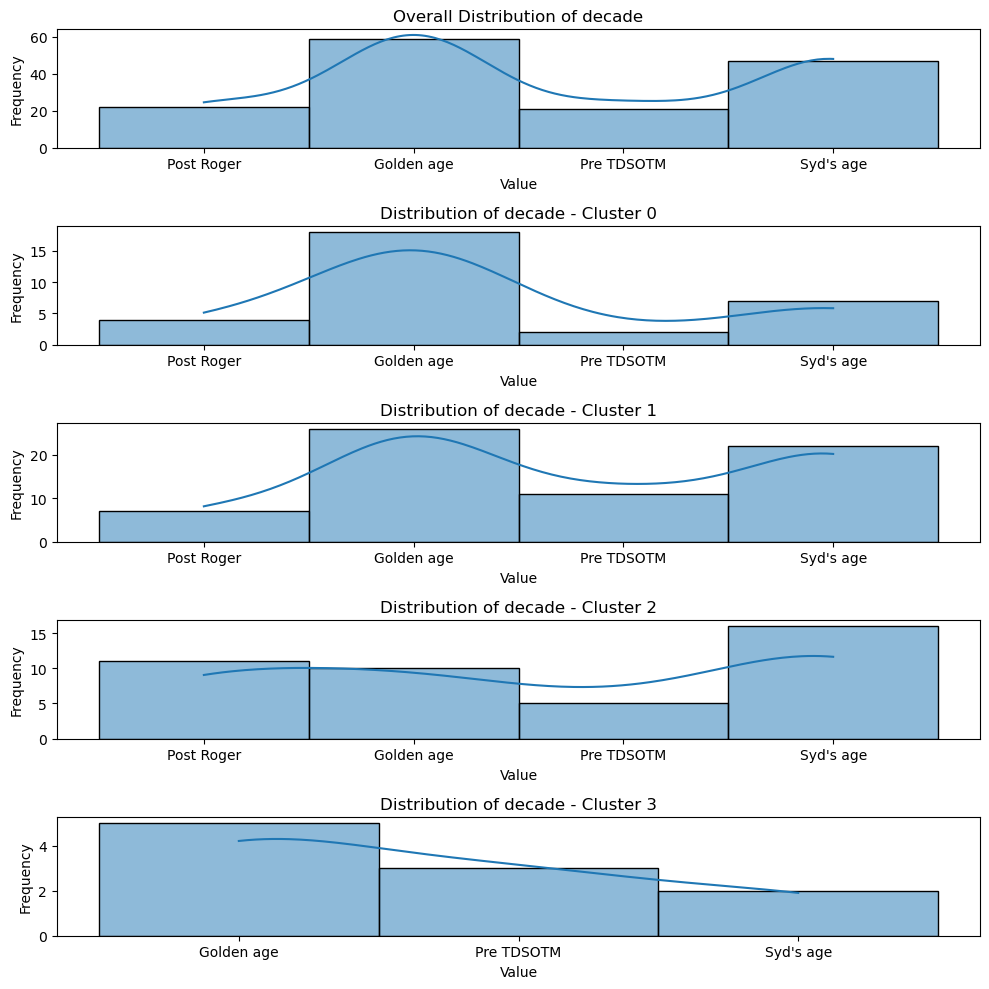

In [113]:
clusters = [i for i in range(k)]

num_subplots = len(clusters) + 1

fig, axs = plt.subplots(num_subplots, figsize=(10, 2 * num_subplots))

if num_subplots == 2:
    axs = [axs[0], axs]


sns.histplot(df_metrics_group_infos['period'], kde=True, ax=axs[0])
axs[0].set_title('Overall Distribution of decade')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')


for i, cluster in enumerate(clusters, start=1):

    cluster_data = df_metrics_group_infos[df_metrics_group_infos['cluster'] == cluster]

    sns.histplot(cluster_data['period'], kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of decade - Cluster {cluster}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')


plt.tight_layout()

plt.show()


In [114]:
for cluster in range(k):
    print(cluster)
    display(df_metrics_group_infos[df_metrics_group_infos['cluster']==cluster]['track_name'].unique())

0


array(['Cluster One', 'Signs of Life', 'A New Machine, Pt. 1',
       'A New Machine, Pt. 2', 'One of the Few', 'Paranoid Eyes',
       'Get Your Filthy Hands Off My Desert', 'Southampton Dock',
       'The Thin Ice', 'Another Brick in the Wall, Pt. 1',
       'The Happiest Days of Our Lives', 'Goodbye Blue Sky',
       'Empty Spaces', "Don't Leave Me Now", 'Goodbye Cruel World',
       'Is There Anybody Out There?', 'Vera', 'Stop', 'Outside the Wall',
       'Pigs on the Wing 1', 'Pigs on the Wing 2', 'Speak to Me',
       'Seamus', 'If', 'Grantchester Meadows',
       "The Grand Vizier's Garden Party, Pt. 3 (Exit)", 'Crying Song',
       'Party Sequence', 'More Blues', 'Quicksilver', 'A Spanish Piece'],
      dtype=object)

1


array(['Wearing the Inside Out', 'Take It Back', 'Coming Back to Life',
       'Learning to Fly', 'One Slip', 'Round and Around',
       'Terminal Frost', 'The Post War Dream', 'Your Possible Pasts',
       "The Hero's Return", "The Gunner's Dream",
       'The Fletcher Memorial Home', 'Two Suns in the Sunset',
       'In the Flesh?', 'Mother', 'One of My Turns', 'Hey You',
       'Nobody Home', 'Bring the Boys Back Home', 'Comfortably Numb',
       'The Show Must Go On', 'In the Flesh', 'Run Like Hell',
       'Welcome to the Machine', 'Have a Cigar', 'Wish You Were Here',
       'Breathe (In the Air)', 'On the Run', 'Time',
       'The Great Gig in the Sky', 'Money', 'Any Colour You Like',
       'Brain Damage', 'Obscured by Clouds', "When You're In",
       'Burning Bridges', "The Gold It's in the...", "Childhood's End",
       'Free Four', 'Stay', 'A Pillow of Winds', 'Fearless', 'San Tropez',
       "Summer '68", 'Astronomy Domine - Live', 'The Narrow Way, Pt. 1',
       'The Narr

2


array(['What Do You Want from Me', 'Poles Apart', 'Marooned',
       'A Great Day for Freedom', 'Keep Talking', 'Lost for Words',
       'High Hopes', 'The Dogs of War', 'On the Turning Away',
       'Yet Another Movie', 'Sorrow', 'When the Tigers Broke Free',
       'The Final Cut', 'Not Now John',
       'Another Brick in the Wall, Pt. 2', 'Young Lust',
       'Another Brick in the Wall, Pt. 3', 'Waiting for the Worms',
       'The Trial', 'Us and Them', 'Eclipse', "Wot's...Uh the Deal",
       'Mudmen', 'Absolutely Curtains', 'One of These Days',
       'Fat Old Sun', 'Careful with That Axe, Eugene - Live',
       'Set the Controls for the Heart of the Sun - Live',
       'Sysyphus, Pt. 1', 'Sysyphus, Pt. 2', 'Sysyphus, Pt. 3',
       'Sysyphus, Pt. 4',
       'Several Species of Small Furry Animals Gathered Together in a Cave and Grooving with a Pict',
       'The Narrow Way, Pt. 2',
       "The Grand Vizier's Garden Party, Pt. 1 (Entrance)",
       "The Grand Vizier's Garden Party

3


array(['Dogs', 'Pigs (Three Different Ones)', 'Sheep',
       'Shine On You Crazy Diamond (Pts. 1-5)',
       'Shine On You Crazy Diamond (Pts. 6-9)', 'Echoes',
       'Atom Heart Mother', "Alan's Psychedelic Breakfast",
       'A Saucerful of Secrets - Live', 'A Saucerful of Secrets'],
      dtype=object)

In [124]:
df_metrics_group_pca_infos = df_metrics_group.drop(
    columns_to_scale,axis=1
).join(
    df_pca,
    how = 'inner'
).join(
    df_metrics[columns_to_scale],
    how = 'inner'
)

In [125]:
df_metrics_group_pca_infos.columns

Index([      'danceability',             'energy',   'instrumentalness',
                 'liveness',               'mode',        'speechiness',
             'acousticness',            'valence', 'odd_time_signature',
                  'cluster',                    0,                    1,
                          2,         'track_name',         'album_name',
             'release_date',         'track_href',               'type',
                      'uri',               'year',             'decade',
                   'period',        'duration_ms',           'loudness',
                    'tempo'],
      dtype='object')

In [126]:

def update_plot(elev=30, azim=45):
    unique_cluster = df_metrics_group_pca_infos['cluster'].unique()
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_cluster)))
    color_dict = dict(zip(unique_cluster, colors))
    
    fig = plt.figure(figsize=(50, 12))
    ax = fig.add_subplot(111, projection='3d')
    
    for cluster in unique_cluster:
        indices = df_metrics_group_pca_infos['cluster'] == cluster
        ax.scatter(
            df_metrics_group_pca_infos.loc[indices, 0], 
            df_metrics_group_pca_infos.loc[indices, 1], 
            df_metrics_group_pca_infos.loc[indices, 2], 
            color=color_dict[cluster], 
            label=cluster
        )
    
    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.set_zlabel('Componente Principal 3')
    
    ax.view_init(elev=elev, azim=azim)
    
    plt.title('PCA - Scatter Plot 3D por Cluster')

    ax.legend(title='Cluster')
    
    plt.show()
    
interact(update_plot, elev=widgets.IntSlider(min=0, max=90, step=1, value=30),
         azim=widgets.IntSlider(min=0, max=360, step=1, value=45))

interactive(children=(IntSlider(value=30, description='elev', max=90), IntSlider(value=45, description='azim',…

<function __main__.update_plot(elev=30, azim=45)>

In [127]:
df_metrics_group_pca_infos.to_csv('/Users/pedrobessa/Documents/Spotify Recommendations /Pink Floyd Clusters.csv')